<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/NN/Quest_Challenge__NN_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Neural Networks using Keras 


### Outline
Our goal is to build a NN for multi-class classification. We need to make several decisions when configuring our NN and focus on these when learning about Keras. 
 1. number of hidden layers
 2. number of neurons in hidden layers
 3. activation functions
 4. type of weight initialization
 5. loss function
 6. learning rate and momentum
 6. optimizer
 7. size of batch
 8. number of epochs
 9. regularization (dropout)

In [1]:
# Setting up the environment: import standard libraries and load the data. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# Load dataset and set app name as index
import pandas as pd

'''
from google.colab import drive
drive.mount('/content/drive')

#set the path to where you stored the AppleStore_prep.csv data here
path="/content/drive/My Drive/Colab Notebooks/WCS/"
'''
import os
path=os.path.split(os.getcwd())[:-1][0]+'/files/'


In [2]:
# Select the app name as row index
# Load dataset and set app name as index
data_file = path +'AppleStore_prep.csv' 
app = pd.read_csv(data_file, index_col=False, sep='\t', encoding='utf-8')
app = app.set_index('track_name')
app.head()

,size_bytes,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,currency_USD,cont_rating_12+,cont_rating_17+,...,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,user_rating
track_name,,,,,,,,,,,,,,,,,,,,,
PAC-MAN Premium,-0.273806,0.388126,0.110902,0.170753,0.651051,0.576471,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,4.0
Evernote - stay organized,-0.112911,-0.295960,1.956477,-0.096808,0.651051,2.218083,0.083642,1,0,0,...,0,1,0,0,0,0,0,0,0,4.0
"WeatherBug - Local Weather, Radar, Maps, Alerts",-0.274542,-0.295960,2.319827,-0.096808,0.651051,-0.307474,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,1,4.0
"eBay: Best App to Buy, Sell, Save! Online Shopping",-0.196620,-0.295960,3.292413,-0.096808,0.651051,0.450193,0.083642,1,1,0,...,0,0,0,1,0,0,0,0,0,4.0
Bible,-0.296117,-0.295960,12.847931,-0.096808,0.651051,4.996197,0.083642,1,0,0,...,0,0,1,0,0,0,0,0,0,4.0


In [3]:

# Prepare the target variable
# LabelEncoder() transforms a string vector to a num vector
# Encode the target variable
encoder = LabelEncoder()
encoder.fit(app["user_rating"])
encoded_y = encoder.transform(app["user_rating"])

# convert integers to dummy variables (i.e. one hot encoded)
from keras.utils import np_utils
hot_y = np_utils.to_categorical(encoded_y)
hot_y  # 6 levels -> 6 columns

#data = np.array(app)  # convert to numpy array


array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

(5037, 35)
(5037, 6)


,size_bytes,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,currency_USD,cont_rating_12+,cont_rating_17+,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
track_name,,,,,,,,,,,,,,,,,,,,,
PAC-MAN Premium,-0.273806,0.388126,0.110902,0.170753,0.651051,0.576471,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Evernote - stay organized,-0.112911,-0.295960,1.956477,-0.096808,0.651051,2.218083,0.083642,1,0,0,...,0,0,1,0,0,0,0,0,0,0
"WeatherBug - Local Weather, Radar, Maps, Alerts",-0.274542,-0.295960,2.319827,-0.096808,0.651051,-0.307474,0.083642,1,0,0,...,0,0,0,0,0,0,0,0,0,1
"eBay: Best App to Buy, Sell, Save! Online Shopping",-0.196620,-0.295960,3.292413,-0.096808,0.651051,0.450193,0.083642,1,1,0,...,0,0,0,0,1,0,0,0,0,0
Bible,-0.296117,-0.295960,12.847931,-0.096808,0.651051,4.996197,0.083642,1,0,0,...,0,0,0,1,0,0,0,0,0,0


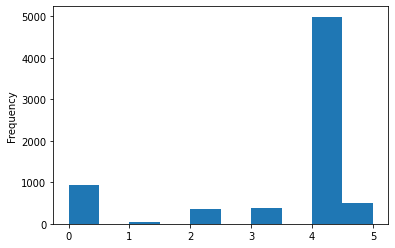

In [4]:
#plot the Rating distribution as seen in the plot below

app['user_rating'].plot.hist()


X = app.copy()
X= X.drop(columns='user_rating')# matrix of covariates only 
y = hot_y.astype(int)  # type conversion of the target

# Let's split our data set in train and test and use random seed = 42 and 30% test size
# Keep in mind that this data set is already normalized, which leads to a leakage of information from train set to test set
# When you are working with a dataset, make sure you normalize the variables in test set according to the parameters of the train set
seed=42
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=seed,test_size=0.3)
    
print (X_train.shape)
print(y_train.shape) 
X.head(5)


### Preparing the Keras framework ###

We will revise the architecture of our basic neural network and look into the tuning of hyperparameters.



### 1+2: Number of hidden layers and number of neurons
The number of layers and the number of neurons is a parameter that you would have to decide on. 

*Deep* neural network is the one with more than one layer, so we will use **2 hidden layers** this time.

As for neurons, look up for the industry practice, we are going for **n=128**.

In [105]:
nb_units = 128

### 3: activation function ###
We will go for industry standard which is **relu** and keep a **softmax** at the end, given our multiclass task. We do not need to define those functions manually this time, Keras got our back.

IMPORTANT NOTE on output function for binary classification.
You could have two output neurons for every class and then run it through the softmax to aqcuire probabilities. However, the more efficient way (faster updating) would be to replace it with 1 neuron and a sigmoid function, which is basically a softmax for 2 classes:

$$y = \frac{1}{1 + e ^ {-x}} = \frac{1}{1 + \frac{1}{e ^ x}} = \frac{1}{\frac{e ^ x + 1}{e ^ x}} <= >\frac{e ^ x}{1 + e ^ x}  $$


### 4: weight initialisation
Weight initialization might seem minor but it can have a major impact on the convergence of the network.

At the picture: all weights are set to 0, second is the normally distributed weights with std=0.4. 
In the rightmost plot, the weights are drawn from normal distributions with variances which are inversely proportional to the number of inputs into each neuron (he normal).

<img src="https://intoli.com/blog/neural-network-initialization/img/training-losses.png"  alt="fwe" style="width: 1000px;"/> 

https://intoli.com/blog/neural-network-initialization/

We will be using the **He Normal initialization**, which is one of the industry standards and recommended for ReLu. It draws samples from a truncated normal distribution with $\mu=0$ and $ \sigma = \sqrt{2 / (i)}$, where $i$ is the number of input units in the weight tensor.

So in our case the standard deviation for our first weight matrix would be:

In [106]:
# If you remember we previously used the (6/(35)) - we used the Glorot uniform (also called Xavier initialization)
std = np.sqrt(2/(X.shape[1])) 
std

0.23904572186687872

## Let's put down what we have decided on already: ##
Keras offer you two "styles" of setting up the structure of your network (they call it two types of model): sequential and functional API (https://keras.io/models/about-keras-mod). It's a matter of preference in most cases. 

Lets implement both to see their differences:

Starting with **sequential** when the layers follow sequentially one after the other, it is slightly leaner in notation.

In [107]:
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

#set up the name of the model and its type

model= Sequential()

# Start adding layers one by one, add first a Dense Layer and specify
#number of neurons
#activation function
#initialisation of weights with kernel_initializer=keras.initializers.he_normal(seed=seed); check doc for more options
#initialization of biases with bias_initializer='zeros', will also be done by default
#set the input shape, i.e. number of features
model.add(Dense(nb_units,input_dim=35,activation='relu',kernel_initializer='normal'))


# Add another Dense Layer
#One more layer with the same configuration
model.add(Dense(nb_units,activation='relu',kernel_initializer='normal'))


# And finally the outout layer as another Dense layer with number of neurosns = number of classes with the same configurations for weights and biases
model.add(Dense(6,activation='softmax',kernel_initializer='normal'))



######################let's see how our architecture looks like (also very helpful to learn how many parameters will be trained and compare to
#the size of your training set)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               4608      
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_43 (Dense)             (None, 6)                 774       
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


Let's try to confirm these parameters manually. Print the numbers of 

In [108]:
#model.__dict__
# print the forumla that gives you the parameters for input to hidden layer 
print(nb_units*(35+1))
# print the forumla that gives you the parameters for first hidden to second hidden layer
print(nb_units*(nb_units+1))
# print the forumla that gives you the parameters for second hidden to output layer
print((nb_units+1)*(6))

4608
16512
774


Now implement the same Architecture using the functional API

In [109]:
# Functional API analogue
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(35,))
l1 = Dense(128, activation="relu")(inputs)
l2 = Dense(128)(l1)
outputs = Dense(6)(l2)
func_model = Model(inputs=inputs, outputs=outputs, name="func_model")

func_model.summary()

Model: "func_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 35)]              0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               4608      
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 774       
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


### Wonderful, we have set up the infrastructure and can proceed with training
Most of the parameters that define the training process are set within the **compile** and **fit** methods.

The parameter optimization strategy is one of the most important choices for the training of the neural network.

We have already learned about one - stochastic gradient descent, it is considered the basic one. Improved performance can be achieved by using optimizers like **Rmsprop, Adagrad,  Adam**, etc.

### 5+6: loss function, learning rate and optimizer
The loss function is defined by the task (mse, binary crossentropy, etc.), in our case it is crossentropy.
Learning rate is set in the optimizer but does not have to remain the same throughout the training (i.e. AdaGrad).

In [110]:
from keras import optimizers
# define the optimizer
# We use SGD as optimizer and cover more options later on, lets start with a learning rate of 0.01. There are many more parameters that we could be adding in the optimizer,
# but for now let us only declare the lr 
opt =keras.optimizers.SGD(learning_rate=0.01) 



# Calling compile and specifying some mandatory arguments completes setting up the NN, ie. loss and metrics
model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])



### 7+8: batch size and epochs ###
Batch size is a chunk of data that would be fed into the optimizer. Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes update the weights more slowly, but lead to more stable convergence. Batch Gradient Descent (all samples used for one update), Online Stochastic Gradient Descent (one sample used for one update), Mini-batch Stochastic Gradient Descent (More than one but less than all samples used for one update).
Batch size determines how many examples you look at before making a weight update. The lower it is, the noisier the training signal is going to be, the higher it is, the longer it will take to compute the gradient for each step.

Epochs is the number of rounds the algorithm will go through the entire dataset. Usually the more epochs of training, the better are the results, until the network starts to overfit. When you see the results flattening out, it's the time to stop.

In [111]:
batch_size = 56 #1 for online SGD
epochs = 30

#And now we fit the model (that is the training part), mind that saving it to the 
# variable will help you retrieve and analyse the training history


story = model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
        validation_data=(X_test, y_test),
          verbose=2)


Epoch 1/30
90/90 - 0s - loss: 1.6012 - accuracy: 0.6845 - val_loss: 1.4354 - val_accuracy: 0.6894
Epoch 2/30
90/90 - 0s - loss: 1.2880 - accuracy: 0.6953 - val_loss: 1.1768 - val_accuracy: 0.6894
Epoch 3/30
90/90 - 0s - loss: 1.1027 - accuracy: 0.6953 - val_loss: 1.0760 - val_accuracy: 0.6894
Epoch 4/30
90/90 - 0s - loss: 1.0457 - accuracy: 0.6953 - val_loss: 1.0505 - val_accuracy: 0.6894
Epoch 5/30
90/90 - 0s - loss: 1.0267 - accuracy: 0.6953 - val_loss: 1.0384 - val_accuracy: 0.6894
Epoch 6/30
90/90 - 0s - loss: 1.0150 - accuracy: 0.6953 - val_loss: 1.0303 - val_accuracy: 0.6894
Epoch 7/30
90/90 - 0s - loss: 1.0067 - accuracy: 0.6953 - val_loss: 1.0242 - val_accuracy: 0.6894
Epoch 8/30
90/90 - 0s - loss: 1.0002 - accuracy: 0.6953 - val_loss: 1.0196 - val_accuracy: 0.6894
Epoch 9/30
90/90 - 0s - loss: 0.9950 - accuracy: 0.6953 - val_loss: 1.0159 - val_accuracy: 0.6894
Epoch 10/30
90/90 - 0s - loss: 0.9906 - accuracy: 0.6953 - val_loss: 1.0129 - val_accuracy: 0.6894
Epoch 11/30
90/90 -

The output already provides a lot of information how well your model performance and whether is shows tendencies of overfitting. You can also obtain such insight explicitly after the model has trained. For example, you can use *evaluate()* to compute model performance. 

In [112]:
#use evaluate to evaluate your model and check the output
loss,accuracy=model.evaluate(X_test, y_test,verbose=0)
# print test loss and accuracy 
print(f"Loss:{loss},Accuracy: {accuracy}")

Loss:0.9886634945869446,Accuracy: 0.6875


The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*. Use history on the variable 'story' you saved model.fit to and check its keys and values:

In [113]:
story.history

{'loss': [1.6011848449707031,
  1.2879688739776611,
  1.1026580333709717,
  1.0457218885421753,
  1.026716709136963,
  1.0149905681610107,
  1.0067157745361328,
  1.0001949071884155,
  0.9950152039527893,
  0.9906483292579651,
  0.9870281219482422,
  0.9837806820869446,
  0.9810552597045898,
  0.9784772396087646,
  0.9762224555015564,
  0.9740417003631592,
  0.9721497297286987,
  0.9703717827796936,
  0.9686887264251709,
  0.9669952392578125,
  0.9655460715293884,
  0.9641192555427551,
  0.9629076719284058,
  0.9616519212722778,
  0.9604368209838867,
  0.9592745900154114,
  0.9583286046981812,
  0.9573082327842712,
  0.9563800096511841,
  0.9555210471153259],
 'accuracy': [0.6845344305038452,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.6952551007270813,
  0.69525510

It is good practice to define custom functions to diagnose model performance and display results as needed. Here are some examples.

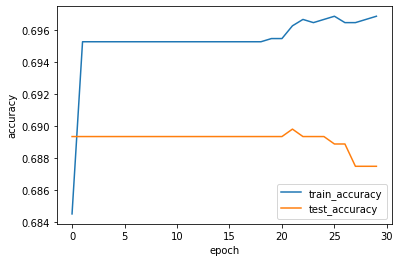

In [114]:
def show_history(story):
    plt.plot(story.history['accuracy'])
    plt.plot(story.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(story)

In [13]:
def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'test_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

#show_history(story)


To get more insight and benefit from the full stack of performance measures that you know, we can simply calculate test set predictions explicitly and then proceed with these in the usual way, producing ROC curves, confusion tables, and the like.

In [116]:
# Compute predictions and save them in yhat
yhat = model.predict(X_test)

yhat.shape

(2160, 6)

In [117]:
# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)
print(yhat_c)

[4 4 4 ... 4 4 4]


In [118]:
pd.crosstab(index=app["user_rating"],columns="count") 

col_0,count
user_rating,
0.0,929
1.0,44
2.0,358
3.0,383
4.0,4991
5.0,492


In [119]:
from sklearn.metrics import classification_report
target_names = ["Grade 0","Grade 1","Grade 2","Grade 3","Grade 4","Grade 5"]
true_label = np.argmax(y_test,axis = 1)
#print  classification report

pd.DataFrame.from_dict(classification_report(true_label, yhat_c, target_names=target_names, sample_weight=None, digits=0, output_dict=True, zero_division=1)).transpose()

,precision,recall,f1-score,support
Grade 0,0.266667,0.014184,0.026936,282.0000
Grade 1,1.000000,0.000000,0.000000,20.0000
Grade 2,1.000000,0.000000,0.000000,110.0000
Grade 3,1.000000,0.000000,0.000000,117.0000
Grade 4,0.690443,0.994627,0.815080,1489.0000
Grade 5,1.000000,0.000000,0.000000,142.0000
accuracy,0.687500,0.687500,0.687500,0.6875
macro avg,0.826185,0.168135,0.140336,2160.0000
weighted avg,0.690865,0.687500,0.565393,2160.0000


In [122]:
from sklearn.metrics import confusion_matrix
# print the confusion matrix
cm = confusion_matrix(true_label, yhat_c)
print(cm)



[[   4    0    0    0  278    0]
 [   0    0    0    0   20    0]
 [   2    0    0    0  108    0]
 [   0    0    0    0  117    0]
 [   8    0    0    0 1481    0]
 [   1    0    0    0  141    0]]


### 9: dropout
Dropout 'impedes' the model and can be used against overfitting. It randomly sets a fraction rate of input units to 0 at each update during training time, which is a manner of regularization. Let's add up the Dropout rates after the hidden layers.



In [125]:
#Let's rebuild the model and add 2 dropout layers after each Hidden Layer with a drop out rate of 0.1 (we can leave the bias setting to default this time)
#import keras
#from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Dropout
nndrop= Sequential()

nndrop.add(Dense(nb_units,input_dim=35,activation='relu',kernel_initializer='normal'))
nndrop.add(Dropout(0.1))
nndrop.add(Dense(nb_units,activation='relu',kernel_initializer='normal'))
nndrop.add(Dropout(0.1))
nndrop.add(Dense(6,activation='softmax',kernel_initializer='normal'))

nndrop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               4608      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 6)                 774       
Total params: 21,894
Trainable params: 21,894
Non-trainable params: 0
_________________________________________________________________


In [129]:
# fit and evaluate the model
nndrop.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
batch_size = 56
epochs = 30

storydrop = nndrop.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
        validation_data=(X_test, y_test),
          verbose=2)

Epoch 1/30
90/90 - 0s - loss: 1.5906 - accuracy: 0.6883 - val_loss: 1.4186 - val_accuracy: 0.6894
Epoch 2/30
90/90 - 0s - loss: 1.2633 - accuracy: 0.6953 - val_loss: 1.1521 - val_accuracy: 0.6894
Epoch 3/30
90/90 - 0s - loss: 1.0862 - accuracy: 0.6953 - val_loss: 1.0681 - val_accuracy: 0.6894
Epoch 4/30
90/90 - 0s - loss: 1.0409 - accuracy: 0.6953 - val_loss: 1.0478 - val_accuracy: 0.6894
Epoch 5/30
90/90 - 0s - loss: 1.0254 - accuracy: 0.6953 - val_loss: 1.0370 - val_accuracy: 0.6894
Epoch 6/30
90/90 - 0s - loss: 1.0154 - accuracy: 0.6953 - val_loss: 1.0295 - val_accuracy: 0.6894
Epoch 7/30
90/90 - 0s - loss: 1.0058 - accuracy: 0.6953 - val_loss: 1.0239 - val_accuracy: 0.6894
Epoch 8/30
90/90 - 0s - loss: 1.0036 - accuracy: 0.6953 - val_loss: 1.0198 - val_accuracy: 0.6894
Epoch 9/30
90/90 - 0s - loss: 0.9959 - accuracy: 0.6953 - val_loss: 1.0167 - val_accuracy: 0.6894
Epoch 10/30
90/90 - 0s - loss: 0.9936 - accuracy: 0.6953 - val_loss: 1.0139 - val_accuracy: 0.6894
Epoch 11/30
90/90 -

Loss:0.9913670420646667,Accuracy: 0.6893518567085266


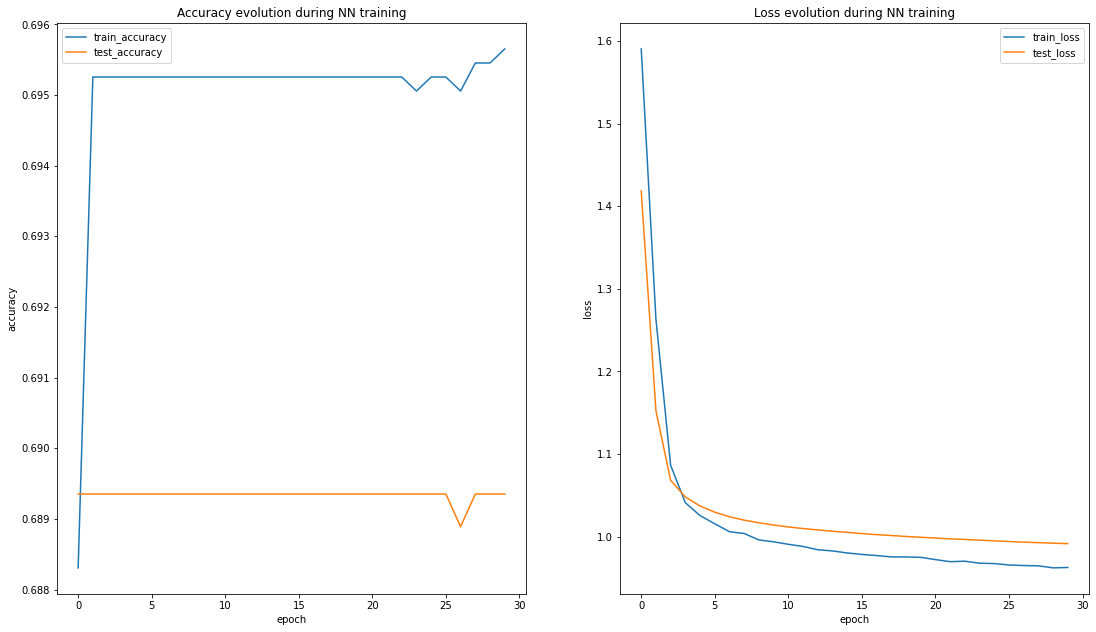

In [131]:
#print Test Loss and Accuracy
loss,accuracy=nndrop.evaluate(X_test, y_test,verbose=0)
# print test loss and accuracy 
print(f"Loss:{loss},Accuracy: {accuracy}")
#plot the history using the above defined function show_history( )
show_history(storydrop)

### more on optimizers

So far we have mainly been looking at the SGD as our optimization algorithm, but there are many more: Adam, RMSprop, Adagrad, etc. (some more info here http://ruder.io/optimizing-gradient-descent/). Like other tools they all have their strengths and weaknesses. We will look more into Adam:

In [134]:
# build the same model as before, including the Dropout Layers, but now instead of SGD, choose Adam with a lr=0.01 as optimizer.
# fit and evaluate the model
#from keras import optimizers
#import keras
#from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Dropout
nnadam= Sequential()

nnadam.add(Dense(nb_units,input_dim=35,activation='relu',kernel_initializer='normal'))
nnadam.add(Dropout(0.1))
nnadam.add(Dense(nb_units,activation='relu',kernel_initializer='normal'))
nnadam.add(Dropout(0.1))
nnadam.add(Dense(6,activation='softmax',kernel_initializer='normal'))

nnadam.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
batch_size = 56
epochs = 30

storyadam = nndrop.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
        validation_data=(X_test, y_test),
          verbose=2)

Epoch 1/60
504/504 - 1s - loss: 0.9421 - accuracy: 0.7010 - val_loss: 0.9743 - val_accuracy: 0.7000
Epoch 2/60
504/504 - 0s - loss: 0.9402 - accuracy: 0.7020 - val_loss: 0.9724 - val_accuracy: 0.7028
Epoch 3/60
504/504 - 0s - loss: 0.9388 - accuracy: 0.7044 - val_loss: 0.9703 - val_accuracy: 0.7023
Epoch 4/60
504/504 - 0s - loss: 0.9370 - accuracy: 0.7030 - val_loss: 0.9674 - val_accuracy: 0.7032
Epoch 5/60
504/504 - 0s - loss: 0.9332 - accuracy: 0.7086 - val_loss: 0.9649 - val_accuracy: 0.7019
Epoch 6/60
504/504 - 0s - loss: 0.9337 - accuracy: 0.7056 - val_loss: 0.9628 - val_accuracy: 0.7065
Epoch 7/60
504/504 - 1s - loss: 0.9285 - accuracy: 0.7076 - val_loss: 0.9616 - val_accuracy: 0.7083
Epoch 8/60
504/504 - 1s - loss: 0.9247 - accuracy: 0.7107 - val_loss: 0.9573 - val_accuracy: 0.7088
Epoch 9/60
504/504 - 0s - loss: 0.9251 - accuracy: 0.7068 - val_loss: 0.9562 - val_accuracy: 0.7097
Epoch 10/60
504/504 - 1s - loss: 0.9215 - accuracy: 0.7074 - val_loss: 0.9558 - val_accuracy: 0.7106

Loss:1.7814247608184814,Accuracy: 0.14166666567325592


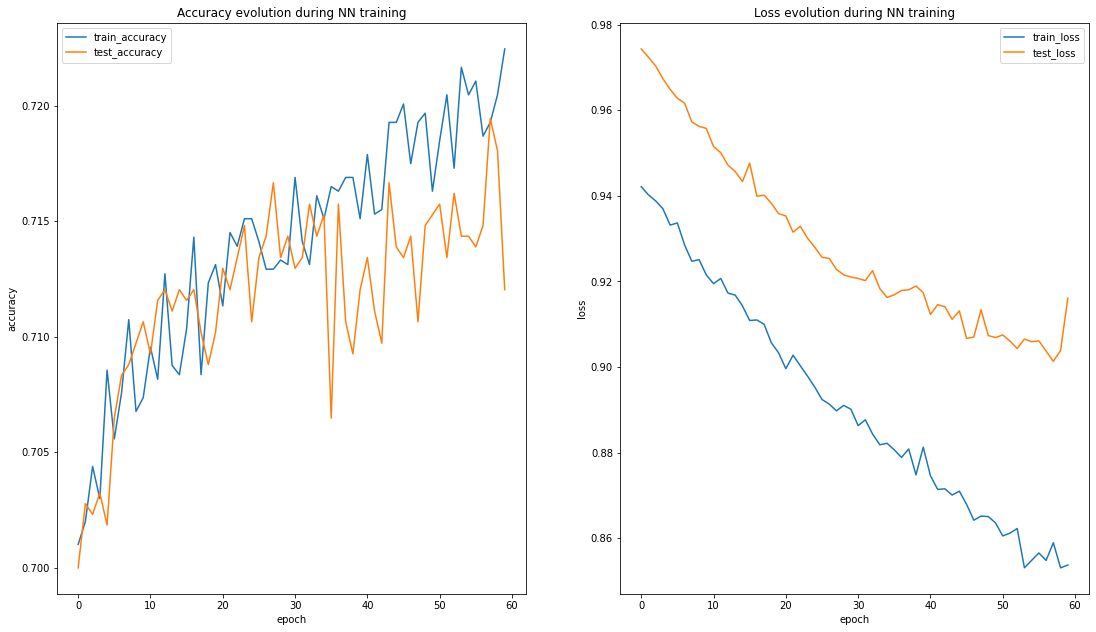

In [136]:
#print Test Loss and Accuracy
loss,accuracy=nnadam.evaluate(X_test, y_test,verbose=0)
# print test loss and accuracy 
print(f"Loss:{loss},Accuracy: {accuracy}")
#plot the history using the above defined function show_history( )
show_history(storyadam)

### 10: momentum and learning rate


Learning rate has been overlooked for a while but currently a lot of research is looking into it.
Lower LR takes more time but allows better allocation of local minimum, higher LR allows faster calculations but drastic jumps do not always yield good results. However, learning rate doesn't have to be remained constant. We will try different learning rate schedules for our NN.

The SGD optimization algorithm in Keras has an argument called **decay**. This argument is used in the time-based learning rate decay schedule equation as follows:
LearningRate = LearningRate * 1/(1 + decay * epoch) (if decay=0 then there is no change)

Another term to know is **momentum**. Use a large momentum. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when your learning rate shrinks to small values.

$$\Delta  W_k(i) = -\eta  \frac{\partial E}{\partial W_k} + \mu  \Delta W_k(i-1)$$


$\mu$ is a momentum term here. Imagine if at some point gradient is zero, it would put the backpropagation to stall. Here momentum comes to the rescue - the algorithm remembers its last step, and adds some proportion of it to the current step. This way, even if the algorithm is stuck in a flat region, or a small local minimum, it can get out and continue towards the global minimum. So learning rate measures how much the current situation affects the next step, while momentum measures how much past steps affect the next step. 



In [208]:
from keras.optimizers import SGD
# rebuild the model with Dropout Layers as before

nnmom= Sequential()

nnmom.add(Dense(nb_units,input_dim=35,activation='relu',kernel_initializer='normal'))
nnmom.add(Dropout(0.1))
nnmom.add(Dense(nb_units,activation='relu',kernel_initializer='normal'))
nnmom.add(Dropout(0.1))
nnmom.add(Dense(6,activation='softmax',kernel_initializer='normal'))

batch_size = 15
epochs = 30



# Compile the model using SGD as optimizer with the following parameters
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
opt = SGD(learning_rate=learning_rate,decay=decay_rate,momentum=momentum) 


nnmom.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])


# Fit and evaluate the model


storymom = nnmom.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
        validation_data=(X_test, y_test),
          verbose=2)



Epoch 1/30
336/336 - 0s - loss: 1.0816 - accuracy: 0.6885 - val_loss: 1.0108 - val_accuracy: 0.6894
Epoch 2/30
336/336 - 0s - loss: 0.9734 - accuracy: 0.6953 - val_loss: 0.9945 - val_accuracy: 0.6875
Epoch 3/30
336/336 - 0s - loss: 0.9624 - accuracy: 0.6962 - val_loss: 0.9859 - val_accuracy: 0.6884
Epoch 4/30
336/336 - 0s - loss: 0.9531 - accuracy: 0.6988 - val_loss: 0.9821 - val_accuracy: 0.6912
Epoch 5/30
336/336 - 0s - loss: 0.9493 - accuracy: 0.6968 - val_loss: 0.9767 - val_accuracy: 0.6926
Epoch 6/30
336/336 - 0s - loss: 0.9416 - accuracy: 0.6994 - val_loss: 0.9691 - val_accuracy: 0.7009
Epoch 7/30
336/336 - 0s - loss: 0.9384 - accuracy: 0.7004 - val_loss: 0.9662 - val_accuracy: 0.7065
Epoch 8/30
336/336 - 0s - loss: 0.9338 - accuracy: 0.7038 - val_loss: 0.9608 - val_accuracy: 0.7074
Epoch 9/30
336/336 - 0s - loss: 0.9293 - accuracy: 0.7066 - val_loss: 0.9560 - val_accuracy: 0.7079
Epoch 10/30
336/336 - 0s - loss: 0.9246 - accuracy: 0.7084 - val_loss: 0.9575 - val_accuracy: 0.7023

0.0003333333333333333

Loss:0.9224649667739868,Accuracy: 0.7097222208976746


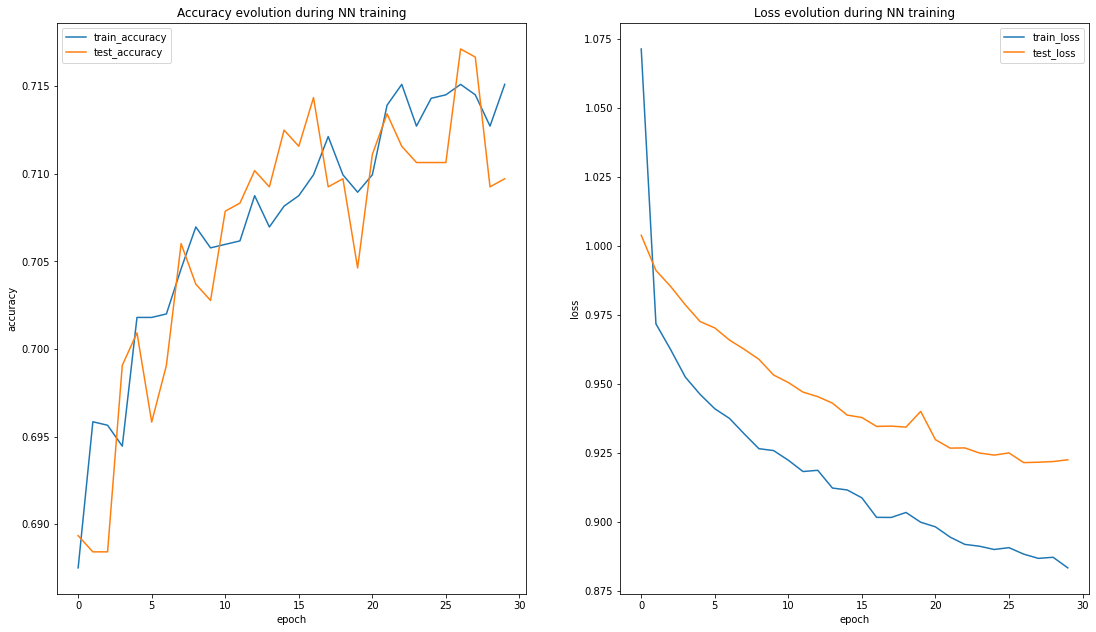

In [183]:
# print test loss and accuracy and plit results with show_history()
#print Test Loss and Accuracy
loss,accuracy=nnmom.evaluate(X_test, y_test,verbose=0)
# print test loss and accuracy 
print(f"Loss:{loss},Accuracy: {accuracy}")
#plot the history using the above defined function show_history( )
show_history(storymom)

## Early stopping

In [203]:
from keras.callbacks import EarlyStopping
# define a Callback in teh following way
cb=EarlyStopping(monitor='val_loss', min_delta=0.1, verbose=0, patience=10, restore_best_weights=True) #difference of loss is below min_delta, it is quantified as no improvement

nnmom= Sequential()

nnmom.add(Dense(nb_units,input_dim=35,activation='relu',kernel_initializer='normal'))
nnmom.add(Dropout(0.1))
nnmom.add(Dense(nb_units,activation='relu',kernel_initializer='normal'))
nnmom.add(Dropout(0.1))
nnmom.add(Dense(6,activation='softmax',kernel_initializer='normal'))

batch_size = 15
epochs = 60
nnmom.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])


#fit the previous model using the above defined callback 
storystop = nnmom.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
        validation_data=(X_test, y_test),
          verbose=2,
          callbacks=cb)


# evaluate the model
loss,accuracy=nnmom.evaluate(X_test, y_test,verbose=0)


Epoch 1/60
336/336 - 0s - loss: 1.6206 - accuracy: 0.6847 - val_loss: 1.4727 - val_accuracy: 0.6894
Epoch 2/60
336/336 - 0s - loss: 1.3365 - accuracy: 0.6953 - val_loss: 1.2285 - val_accuracy: 0.6894
Epoch 3/60
336/336 - 0s - loss: 1.1435 - accuracy: 0.6953 - val_loss: 1.0999 - val_accuracy: 0.6894
Epoch 4/60
336/336 - 0s - loss: 1.0638 - accuracy: 0.6953 - val_loss: 1.0617 - val_accuracy: 0.6894
Epoch 5/60
336/336 - 0s - loss: 1.0401 - accuracy: 0.6953 - val_loss: 1.0480 - val_accuracy: 0.6894
Epoch 6/60
336/336 - 0s - loss: 1.0273 - accuracy: 0.6953 - val_loss: 1.0395 - val_accuracy: 0.6894
Epoch 7/60
336/336 - 0s - loss: 1.0185 - accuracy: 0.6953 - val_loss: 1.0333 - val_accuracy: 0.6894
Epoch 8/60
336/336 - 0s - loss: 1.0125 - accuracy: 0.6953 - val_loss: 1.0285 - val_accuracy: 0.6894
Epoch 9/60
336/336 - 0s - loss: 1.0079 - accuracy: 0.6953 - val_loss: 1.0247 - val_accuracy: 0.6894
Epoch 10/60
336/336 - 0s - loss: 1.0042 - accuracy: 0.6953 - val_loss: 1.0215 - val_accuracy: 0.6894

Loss:0.9895496368408203,Accuracy: 0.6912037134170532


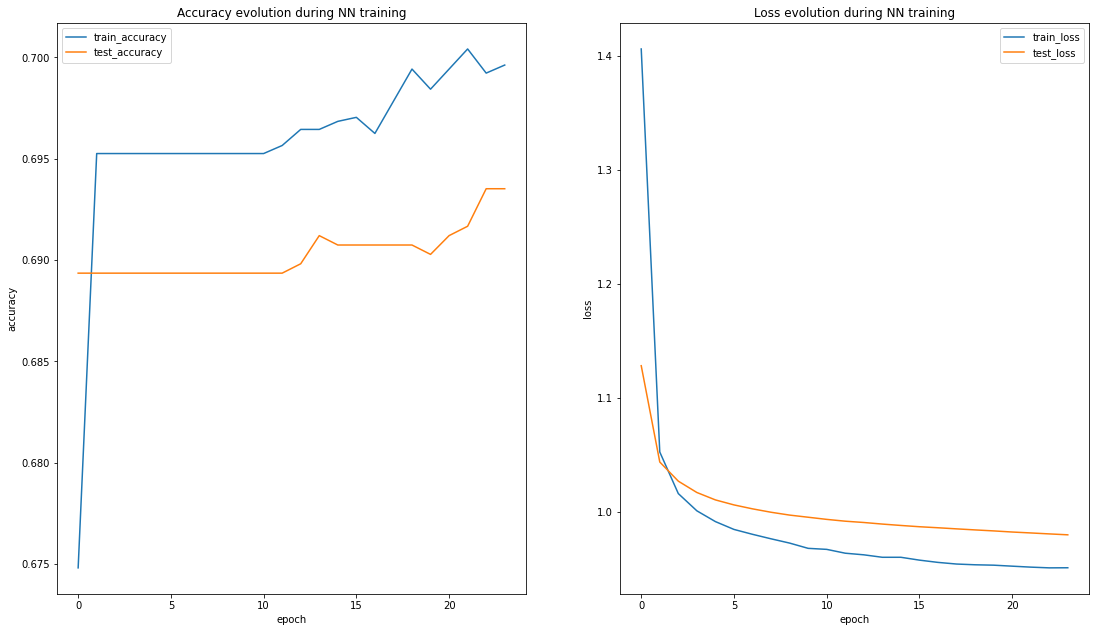

In [190]:
#print loss and accuracy and plot it using show_history()

print(f"Loss:{loss},Accuracy: {accuracy}")
#plot the history using the above defined function show_history( )
show_history(storystop)

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(X_train)
print(pca.explained_variance_ratio_.cumsum())
nodes= pca.n_components_
nodes

[0.1674823  0.32163421 0.44817075 0.57067498 0.6830299  0.78931206
 0.8714502  0.90547583 0.92800792 0.94403099 0.95381768]


11

In [114]:
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD,Adam
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Dropout
cb=EarlyStopping(monitor='val_loss', min_delta=0.05, verbose=0, patience=10, restore_best_weights=True) #difference of loss is below min_delta, it is quantified as no improvement

nnadam= Sequential()
nnpca= Sequential()
nb_units=128
nnpca.add(Dense(nodes,input_dim=35,activation='relu',kernel_initializer='normal'))
nnpca.add(Dropout(0.1))
nnpca.add(Dense(nodes,activation='relu',kernel_initializer='normal'))
nnpca.add(Dropout(0.1))
nnpca.add(Dense(6,activation='softmax',kernel_initializer='normal'))

learning_rate = 0.2
decay_rate = learning_rate / epochs
momentum = 0.8
opt = SGD(learning_rate=learning_rate,decay=decay_rate,momentum=momentum) 
optadam=Adam(learning_rate=learning_rate)
batch_size = 30
epochs = 60
nnpca.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])


#fit the previous model using the above defined callback 
storypca = nnpca.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
        validation_data=(X_test, y_test),
          verbose=2,
          callbacks=cb
                    )





Epoch 1/60
168/168 - 0s - loss: 1.0394 - accuracy: 0.6901 - val_loss: 1.0042 - val_accuracy: 0.6894
Epoch 2/60
168/168 - 0s - loss: 0.9684 - accuracy: 0.6937 - val_loss: 0.9951 - val_accuracy: 0.6926
Epoch 3/60
168/168 - 0s - loss: 0.9627 - accuracy: 0.6988 - val_loss: 0.9789 - val_accuracy: 0.6926
Epoch 4/60
168/168 - 0s - loss: 0.9543 - accuracy: 0.6988 - val_loss: 0.9757 - val_accuracy: 0.7046
Epoch 5/60
168/168 - 0s - loss: 0.9413 - accuracy: 0.7036 - val_loss: 0.9728 - val_accuracy: 0.7014
Epoch 6/60
168/168 - 0s - loss: 0.9381 - accuracy: 0.7004 - val_loss: 0.9704 - val_accuracy: 0.7028
Epoch 7/60
168/168 - 0s - loss: 0.9387 - accuracy: 0.7030 - val_loss: 0.9738 - val_accuracy: 0.7019
Epoch 8/60
168/168 - 0s - loss: 0.9345 - accuracy: 0.7062 - val_loss: 0.9564 - val_accuracy: 0.7083
Epoch 9/60
168/168 - 0s - loss: 0.9293 - accuracy: 0.7064 - val_loss: 0.9529 - val_accuracy: 0.7116
Epoch 10/60
168/168 - 0s - loss: 0.9254 - accuracy: 0.7086 - val_loss: 0.9513 - val_accuracy: 0.7148

Loss:0.9528730511665344,Accuracy: 0.7115740776062012


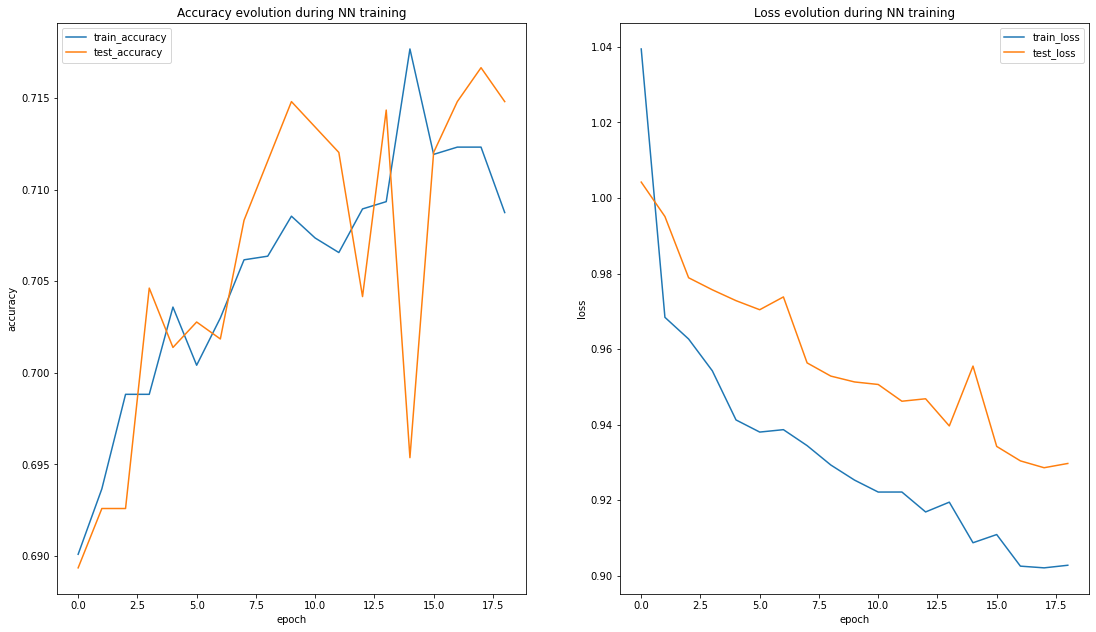

In [115]:
# evaluate the model
loss,accuracy=nnpca.evaluate(X_test, y_test,verbose=0)
print(f"Loss:{loss},Accuracy: {accuracy}")
#plot the history using the above defined function show_history( )
show_history(storypca)

In [113]:
del nnpca,storypca

NameError: name 'nnpca' is not defined